This analysis is for checking the performance of Model with 7 layer CNN + MaxPooling with a differrent set of train and validation split.  

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.metrics import classification_report

In [13]:
image_path = "../input/intel-image-classification/seg_train/seg_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="training",
  seed=223)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="validation",
  seed=223)

test_path = "../input/intel-image-classification/seg_test/seg_test"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  image_size=(224,224),
  batch_size=32)

new_test_path = "../input/new-test-dataset/test_images"
new_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  new_test_path,
  image_size=(224,224),
  batch_size=32)

Found 14034 files belonging to 6 classes.
Using 10526 files for training.
Found 14034 files belonging to 6 classes.
Using 3508 files for validation.
Found 3000 files belonging to 6 classes.
Found 37 files belonging to 6 classes.


In [3]:
import glob
import pathlib 

data_dir = pathlib.Path(image_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


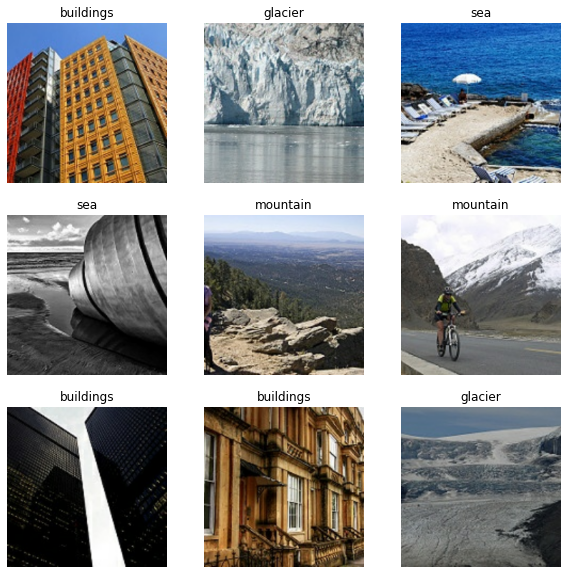

In [14]:
## visualize train set images
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

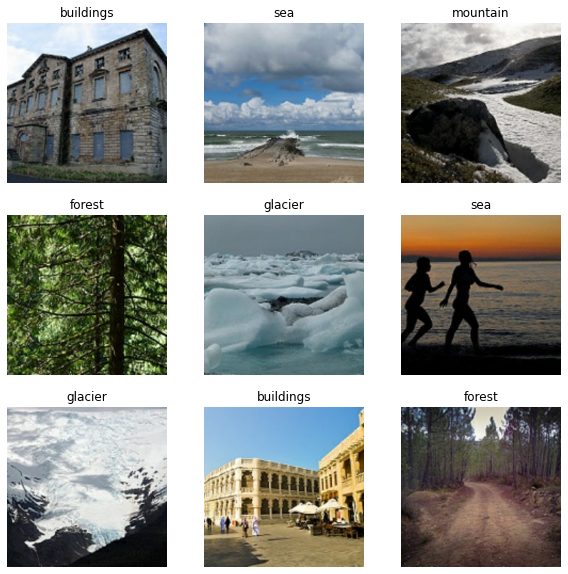

In [15]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

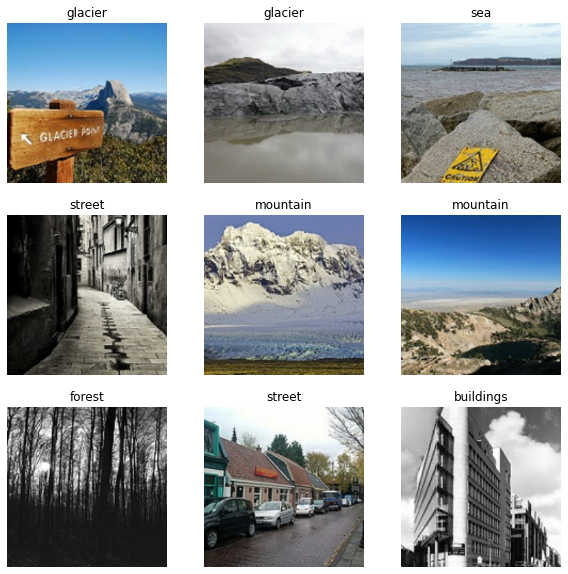

In [16]:
## visualize test images 
image_batch, label_batch = next(iter(test_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

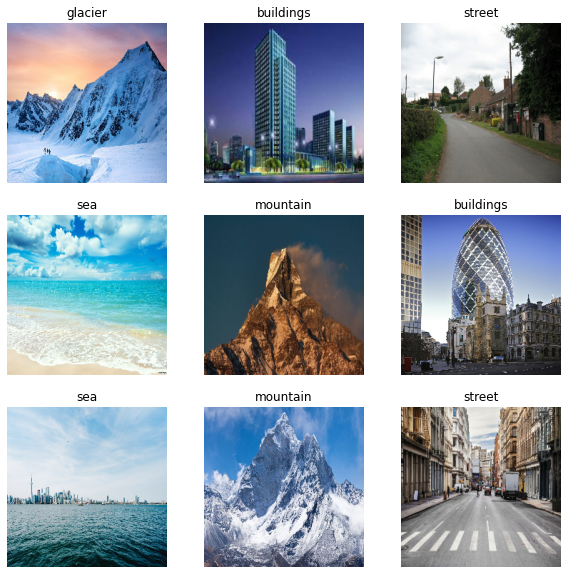

In [17]:
## visualize new test images 
image_batch, label_batch = next(iter(new_test_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

In [8]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img , (224,224))
        if img is not None:
            images.append(img)
    return images

pred_images = load_images_from_folder("../input/intel-image-classification/seg_pred/seg_pred")

In [9]:
type(pred_images)

list

In [10]:
pred_images = np.array(pred_images)
pred_images.shape

(7301, 224, 224, 3)

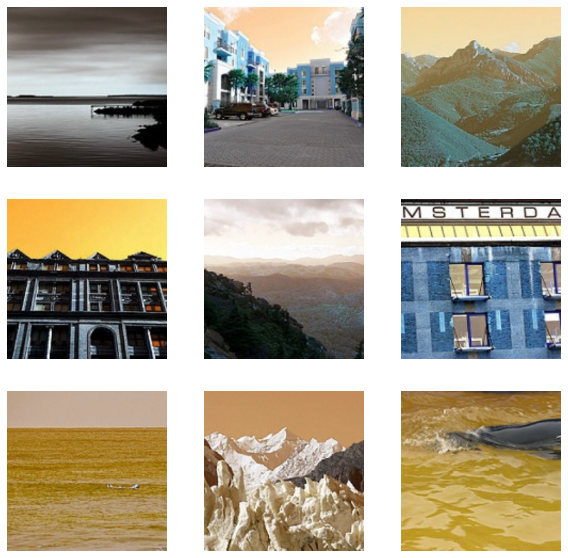

In [11]:
## visualize prediction images 
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pred_images[i])
    plt.axis("off")

Epoch 1/25
329/329 [==============================] - 177s 535ms/step - loss: 1.4330 - accuracy: 0.4399 - val_loss: 3.3316 - val_accuracy: 0.3056
Epoch 2/25
329/329 [==============================] - 172s 523ms/step - loss: 1.0659 - accuracy: 0.5679 - val_loss: 0.9311 - val_accuracy: 0.6306
Epoch 3/25
329/329 [==============================] - 173s 524ms/step - loss: 0.8781 - accuracy: 0.6416 - val_loss: 0.8122 - val_accuracy: 0.7072
Epoch 4/25
329/329 [==============================] - 172s 523ms/step - loss: 0.8275 - accuracy: 0.6710 - val_loss: 0.7910 - val_accuracy: 0.6887
Epoch 5/25
329/329 [==============================] - 172s 522ms/step - loss: 0.6902 - accuracy: 0.7327 - val_loss: 0.6396 - val_accuracy: 0.7597
Epoch 6/25
329/329 [==============================] - 172s 523ms/step - loss: 0.6180 - accuracy: 0.7672 - val_loss: 0.7496 - val_accuracy: 0.7181
Epoch 7/25
329/329 [==============================] - 173s 526ms/step - loss: 0.5373 - accuracy: 0.8081 - val_loss: 0.5579 -

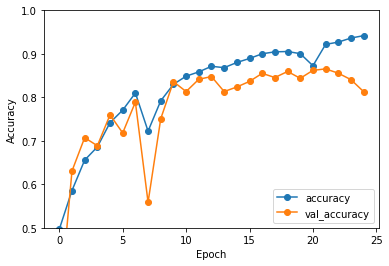

In [ ]:
## 7 layer cnn + max pooling + batchnormalization

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 512, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(6, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=25, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
new_test_loss, new_test_acc = model.evaluate(new_test_ds)
print("Test image accuracy :{}".format(new_test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_7')
##

## for test data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report for test ds')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
## for new test data set , check the classification report.
new_val_pred = np.array([])
new_val_labels = np.array([])
for x, y in new_test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    new_val_pred = np.concatenate([new_val_pred,np.array(predictions)])
    new_val_labels = np.concatenate([new_val_labels , y.numpy()])
    
##
print('Classification Report for new test ds')
target_names = class_names
print(classification_report(new_val_labels, new_val_pred, target_names=class_names))
##
print(model.summary())
##
pred_images_prediction = model.predict(pred_images)
##
pred_images_class = []
for i in range(len(pred_images_prediction)):
    pred_images_class.append(np.argmax(pred_images_prediction[i], axis = -1))
##
## visualize prediction images with the prediction 
plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title(class_names[pred_images_class[i]])
    plt.axis("off")

Model accuracy has come down to 0.8 on test data set when the model is trained on this set of train and validation images.   